# TP3 Logistic Regression and SGD


### Table of Contents

* [1. Logistic Regression using Sklearn](#chapter1)
* [2. Gradient descent for Logistic Regression](#chapter2)
* [3. mini-batch SGD](#chapter3)
* [4. Logistic Regression for IRIS](#chapter4)
* [5. Logistic Regression for MNIST and CIFAR10](#chapter5)

## 0. Data preparation 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

First we will use simulated data : 

In [3]:
np.random.seed(12)
half_observation_number = 5_000

rng = np.random.default_rng()
x1 = rng.multivariate_normal([0,0],[[1,0.75],[0.75,1]], half_observation_number)
x2 = rng.multivariate_normal([0,2.7],[[1,0.75],[0.75,1]], half_observation_number)

X = np.vstack((x1, x2)).astype(np.float32)
y = np.hstack((np.zeros(half_observation_number),np.ones(half_observation_number)))


*In the first three sections, we will focus solely on training the model. Therefore, we do not use a test set.* 

**Exercise 1** : How many features are there ? Is it a regression problem or a classification problem ? 

In [4]:
print(f"there is {X.ndim} features ")
print("It's a binary classification ploblem")

there is 2 features 
It's a binary classification ploblem


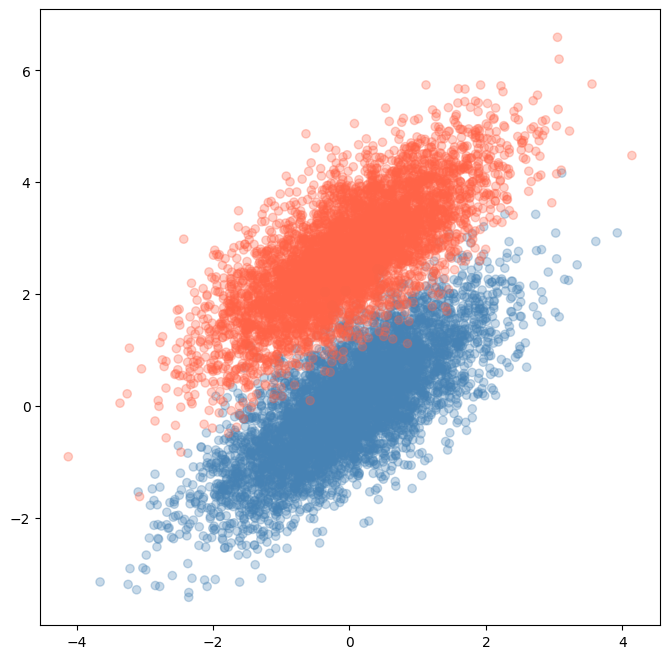

In [5]:
import matplotlib.colors as mcolors
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3, cmap=mcolors.ListedColormap(["steelblue", "tomato"]))

**Exercise 2** : What is the parameter `c=y` used for ? (you can try the following code without  `c=y`). 
*Reference* : 
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

C:\Users\Antonin\AppData\Local\Temp\ipykernel_7632\3829564597.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0], X[:,1], alpha=0.3, cmap=mcolors.ListedColormap(["steelblue", "tomato"]))


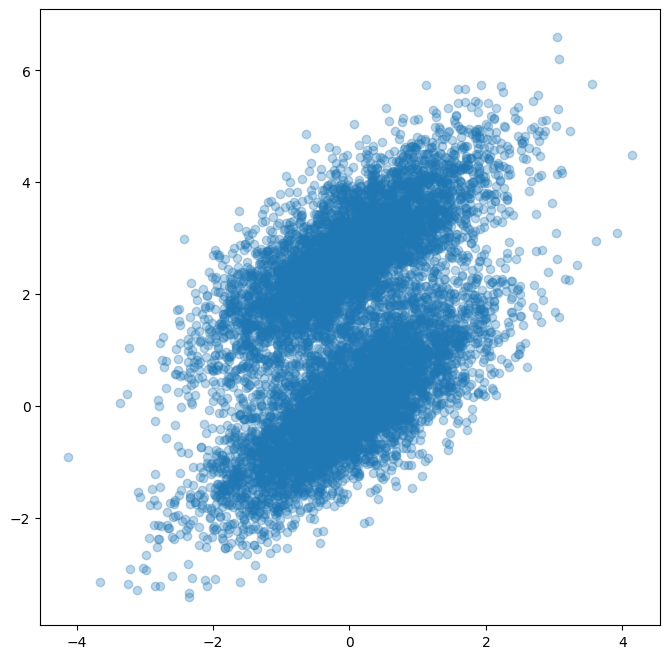

In [6]:
plt.figure(figsize=(8,8))

plt.scatter(X[:,0], X[:,1], alpha=0.3, cmap=mcolors.ListedColormap(["steelblue", "tomato"]))
plt.show()

Answer for Exercise 2 :

"c=y" stand for the color of the plot. 





_____________

## 1. Logistic Regression in Sklearn<a class="anchor" id="chapter1"></a> 

Now let us fit a logistic regression model using `Sklearn`. 

*Reference* :

- `LogisticRegression` in `sklearn.linear_model` : 
https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression (Version 1.3)

- Cost function for  the logistic regression in  Sklearn : Section 1.1.11.1 of 
https://scikit-learn.org/dev/modules/linear_model.html#logistic-regression 

In [7]:
import scipy.stats as stats
import sklearn.linear_model as lm

**Exercice 3** : Create a  logistic regression model, named  `Reglog`, using the parameters  `fit_intercept=True` and  `penalty=None`. 

- What does `fit_intercept=True` mean ?

- `C` is a regularization parameter (ridge). In order to use the usual (unpenalized) logistic regression, we can specify `penalty='none'`.   (Alternatively, one could use  a large enough parameter for penalization, e.g. C=1e15.) 

"fit_intercept = True" means that we add a intercept 

In [8]:
# Answer for Exercise 3

Reglod = lm.LogisticRegression(fit_intercept=True, penalty=None)

**Exercise 4** : Fit the model `Reglog` on the data  `(X,y)`. 

In [9]:
# Answer for Exercise 4

Reglod.fit(X, y)

LogisticRegression(penalty=None)

**Exercise 5** : (1) Display the coefficients and the intercept. 

(2) Plot the decision boundary and the scatter plot on the same graph (x-axis scale : -4  to 4).

In [10]:
# Answer for Exercise 5 (1)

print(f"coefficient and intercept are {Reglod.coef_} and {Reglod.intercept_}")

coefficient and intercept are [[-4.87187571  6.39553659]] and [-8.6593227]


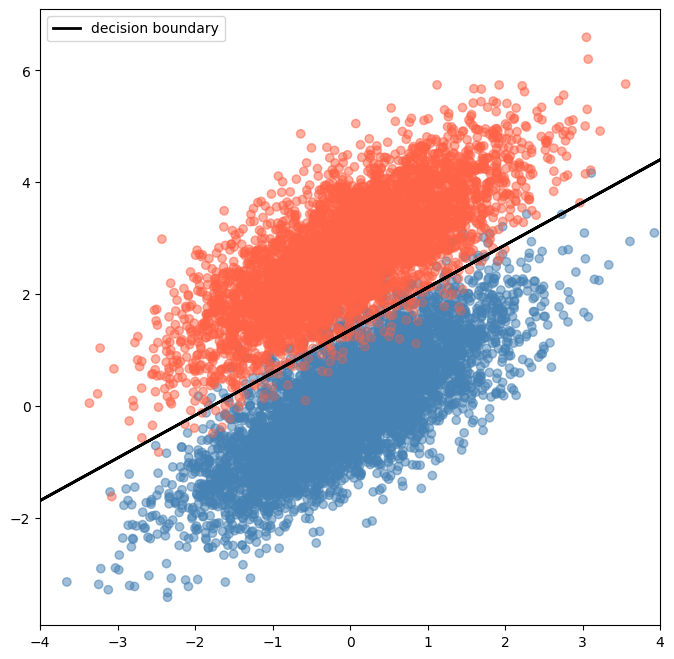

In [11]:
# Answer for Exercise 5 (2)
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3, cmap=mcolors.ListedColormap(["steelblue", "tomato"]))
# Complete

def deci_bound(X, coef):
    return (-X * coef[0][0] - coef[1])/coef[0][1]

coef = [Reglod.coef_[0], Reglod.intercept_]
plt.plot(X[:,0],deci_bound(X[:,0],coef), color="black", linewidth=2, label="decision boundary")
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3, cmap=mcolors.ListedColormap(["steelblue", "tomato"]))
plt.xlim(-4,4)
plt.legend()
plt.show()


_____________

## 2.  Gradient descent for  logistic regression <a class="anchor" id="chapter2"></a> 

Now let us  write the gradient descent algorithm for the logistic regression cost function.

**Exercise 6** : write a  function named  `sigmoid` (that obviously computes the sigmoid function) and plot the curve of  `sigmoid` on $[-7,7]$. 

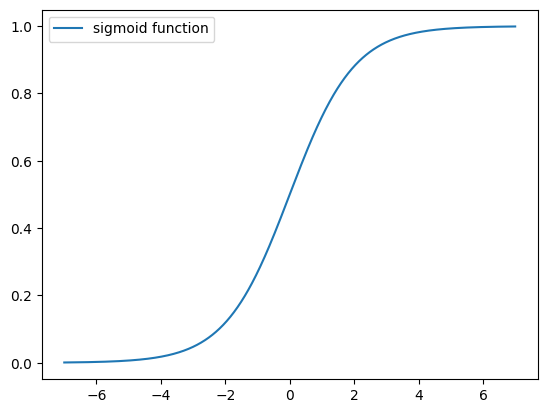

In [12]:
# Answer for Exercise 6

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

xx = np.linspace(-7,7,1000)
plt.plot(xx, sigmoid(xx), label="sigmoid function")
plt.legend()
plt.show()


**Exercise 7** : let $w$ denote as the weight vector and $b$ as the intercept.

Write the cost function of the logistic regression defined by  "$-$ log-likelihood" on the data `(X,y)` and name it `cost_log_likelihood`. 

In [13]:
# Answer for Exercise 7

def cost_log_likelihood(X, y, w, b):
    z = sigmoid(X.dot(w) + b)
    return -np.sum(y * np.log(z) + (1-y) * np.log(1-z))

**Exercise 8** : write a function implementing the gradient descent algorithm for the logistic regression cost function. 

- Name this function `GD_training`. (`GD` is for `Gradient Descent`).

- The input of  `GD_training` will be 

  - the data `X,y`, 
       
  - the number of iterations  (num_steps)    
  - the  learning rate (learning_rate)

- We will initialize the paramaters as follows :  $w=(0,0)$ and $b=0$.


In [14]:
# Answer for Exercise 8 : 

def GD_training(X,y, num_steps, learning_rate):
    
    w,b= np.zeros(X.shape[1]),0
    z = sigmoid(X.dot(w) + b) 

    for step in range(num_steps):
  
        grad_w = (z - y).dot(X)
        grad_b = np.sum((z - y))
    
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b
        
        z = sigmoid(X.dot(w) + b)
        
        if step%300==0:
            print ("In step ",step,", the parameters are ", w, b,";")
            print ("and the value of the cost function is ", cost_log_likelihood(X,y,w,b))

    return w,b

**Exercise 9** : Run the next cell. Compare the boundary decision we get using `Sklearn` (with the default algorithm) with the boundary we got using gradient descent. 

In [15]:
w_GD,b_GD=GD_training(X, y, num_steps=3000, learning_rate=5e-5)

print("\n")
print ("The parameters are : ", w_GD,b_GD)

In step  0 , the parameters are  [-0.0006946   0.33757838] 0.0 ;
and the value of the cost function is  5281.856677597023
In step  300 , the parameters are  [-2.35255934  3.25262882] -4.187987911050873 ;
and the value of the cost function is  752.0286502078125


In step  600 , the parameters are  [-2.90467684  3.92744372] -5.168132524991117 ;
and the value of the cost function is  633.58362169974
In step  900 , the parameters are  [-3.2391479   4.34116577] -5.7617083478368185 ;
and the value of the cost function is  590.7180770913374
In step  1200 , the parameters are  [-3.47763486  4.63801877] -6.184903320424737 ;
and the value of the cost function is  568.9707591803815
In step  1500 , the parameters are  [-3.66095318  4.86711737] -6.510182409530912 ;
and the value of the cost function is  556.1230865897871
In step  1800 , the parameters are  [-3.80815294  5.05159552] -6.7713601810975845 ;
and the value of the cost function is  547.836791643983
In step  2100 , the parameters are  [-3.92977652  5.20433973] -6.987148539080862 ;
and the value of the cost function is  542.1775644985642
In step  2400 , the parameters are  [-4.03231237  5.33332117] -7.169063717150644 ;
and the value of the cost function is  538.1536722067581
In step  2700 , the par

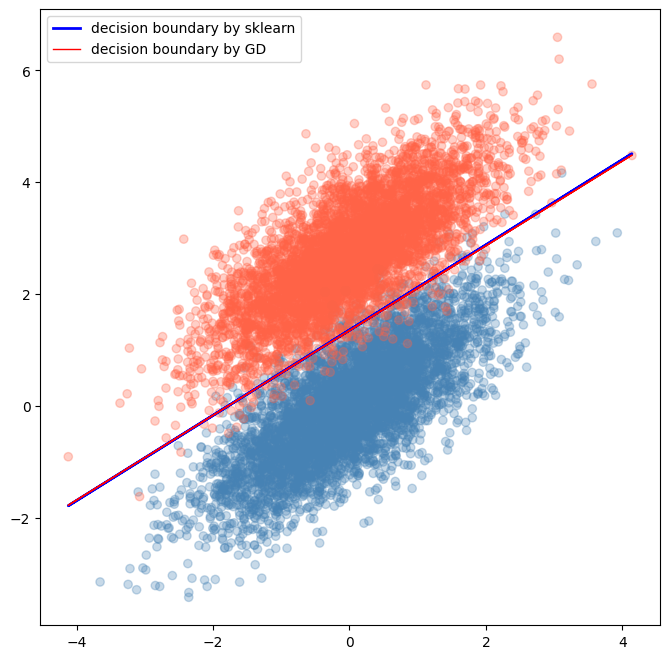

In [16]:
# Answer for Exercise 9 : 

plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3, cmap=mcolors.ListedColormap(["steelblue", "tomato"]))

# Plot the decision boundaries 

# blue : the decision boundary using Sklearn
ceof = [Reglod.coef_[0], Reglod.intercept_]
plt.plot(X[:,0],deci_bound(X[:,0],coef), color="blue", linewidth=2, label="decision boundary by sklearn")

# rouge : the decision boundary using  GD 
plt.plot(X[:,0],deci_bound(X[:,0],[w_GD,b_GD]), color="red", linewidth=1,label="decision boundary by GD")

plt.legend()
plt.show()


------------------------------

## 3. mini-batch SGD for the  logistic regression <a class="anchor" id="chapter3"></a> 

**Exercise 10** : write a function implementing  mini-batch SGD for the cost function of a  logistic regression. 

- Name this function `mini_batch_SGD`. `SGD` is short for  `Stochastic Gradient Descent`.

- the input will be 

  - the data `X,y`,   

  - the learning rate (learning_rate)
    
  - the mini-batch size (batch_size)
  
  - the number of epochs (epochs)

- Initialization :  $w=(0,0)$ et $b=0$.

- We add an output `costs_SGD`  to track the values of the cost function throughout the training process.

To simplify, you can assume that the sample size is a multiple of the batch size.  

Hint : you can use `np.random.default_rng.shuffle()` to shuffle the dataset (permutation) : https://numpy.org/doc/2.2/reference/random/generated/numpy.random.Generator.shuffle.html

Pay attention to the fact that you must sample non only `X` but also `y`.

In [17]:
a=np.arange(10)
rng=np.random.default_rng(seed=42)
rng.shuffle(a)# shuffle in place
a

array([5, 6, 0, 7, 3, 2, 4, 9, 1, 8])

In [18]:
def mini_batch_SGD(X, y,  learning_rate, batch_size, epochs):
    """
    Mini-batch stochastic gradient descent for logistic regression.

    Parameters:
        X (numpy.ndarray): Input data of shape (n, d), where n is the number of samples and d is the number of features.
        y (numpy.ndarray): Labels of shape (n,), where n is the sample size.
        learning_rate (float): Learning rate for gradient descent.
        batch_size (int): Size of each mini-batch.
        epochs (int): Number of epochs to train.
    
    Returns:
        w (numpy.ndarray): Final weight vector of shape (d,).
        b (float): Final bias term.
        costs_SGD (list): Cost function values at each step.
    """
    # Initialization
    n, d = X.shape
    w = np.zeros(d)
    b = 0
    costs_SGD = []

    for epoch in range(epochs):
        # Shuffle the data at the beginning of each epoch
        indices = np.arange(n)
        np.random.default_rng(seed=epoch).shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Mini-batch processing
        for i in range(0, n, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Compute predictions
            z_batch = X_batch.dot(w) + b
            predictions_batch = sigmoid(z_batch)

            # Compute gradients
            a = predictions_batch - y_batch
            grad_w = X_batch.T.dot(a)
            grad_b = np.sum(a)
            

            # Update parameters
            w -= learning_rate * grad_w
            b -= learning_rate * grad_b

            # Compute and store cost for tracking
            current_cost=cost_log_likelihood(X, y, w, b)
        
            #if epoch % 10 == 0:
                #print(f"Epoch {epoch}/{epochs}, Cost: {current_cost:.4f}")
                #print (" and the parameters are", w, b,";")
                
            
            costs_SGD.append(current_cost)

    return w, b, costs_SGD

In [19]:
# when n//batch_size=0
x=np.array(['a','b','c','d','e','f'])
indices=np.array([0,1,2,3,4,5])
n=len(x)
np.random.default_rng().shuffle(indices)
batch_size=2
x_shuffled=x[indices]
j=0
for i in range(0,n,batch_size):
    print(f"batch number {j}", x_shuffled[i:i+batch_size])
    j+=1

batch number 0 ['f' 'b']
batch number 1 ['c' 'd']
batch number 2 ['e' 'a']


In [20]:
#when n//batch_size different from zero. 
x=np.array(['a','b','c','d','e','f','g'])
indices=np.array([0,1,2,3,4,5,6])
n=len(x)
np.random.default_rng().shuffle(indices)
batch_size=2
x_shuffled=x[indices]
j=0
for i in range(0,n,batch_size):
    print(f"batch number {j}", x_shuffled[i:i+batch_size])
    j+=1

batch number 0 ['e' 'f']
batch number 1 ['b' 'g']
batch number 2 ['d' 'a']
batch number 3 ['c']


**Exercise 11** : (1) Run the next cell 
- Remark : The  sample size here is 10,000. Here we choose the mini-batch size to be 1,000. $\Rightarrow$ At each iteration of SGD, we perform only 10% of the computations compared to standard gradient descent. 

- We can increase the `learning_rate` to `5e-4` to achieve faster convergence.

(2) Compare the boundary decisions that we get using   SGD with the boundary decision we get using `Sklearn`.

(3) Plot the curve of `costs_SGD`, what can be observed ?

In [21]:
w_SGD, b_SGD, costs_SGD = mini_batch_SGD(X, y, 
                                learning_rate = 5e-4, batch_size=1000,epochs=30)

print ("The parameters computed by stochastic gradient descent are: ", w_SGD, b_SGD)


The parameters computed by stochastic gradient descent are:  [-2.34983173  3.25022255] -4.183278754933882


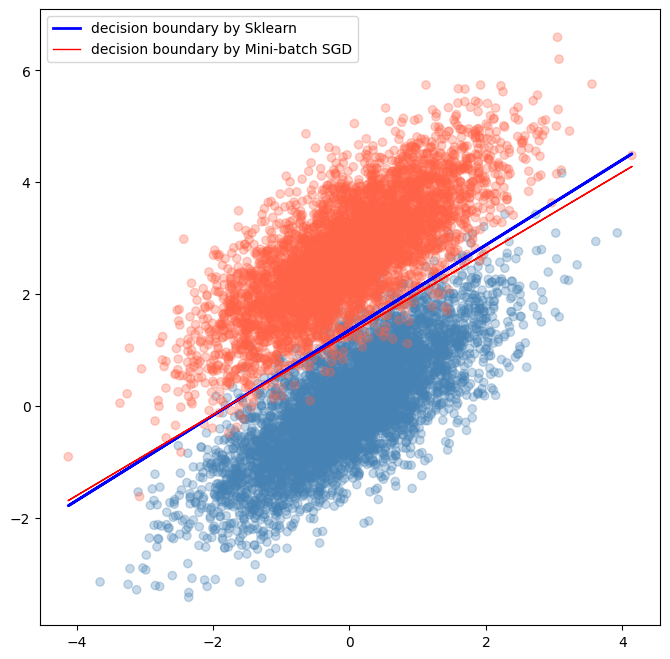

In [22]:
# Answer for Exercise 11 - (2): 

plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3, cmap=mcolors.ListedColormap(["steelblue", "tomato"]))

# Plot the decision boundaries 

# blue : the decision boundary using Sklearn
coef = [Reglod.coef_[0], Reglod.intercept_]
plt.plot(X[:,0],deci_bound(X[:,0],coef), color="blue", linewidth=2, label="decision boundary by Sklearn")

# rouge : the decision boundary using  GD 
plt.plot(X[:,0],deci_bound(X[:,0],[w_SGD,b_SGD]), color="red", linewidth=1,label="decision boundary by Mini-batch SGD")

plt.legend()
plt.show()

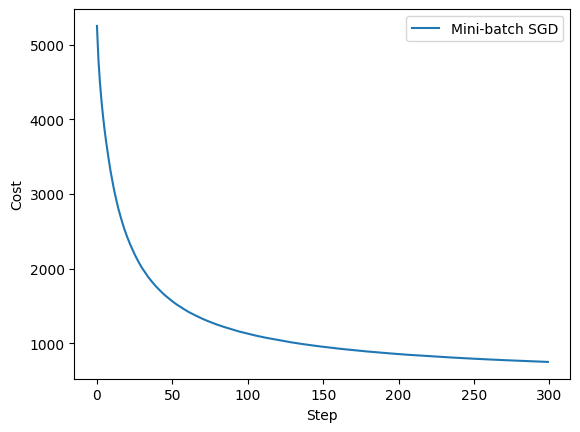

In [23]:
# Answer for Exercise 10 - (3): 
plt.plot(np.arange(len(costs_SGD)), costs_SGD, label="Mini-batch SGD")
plt.xlabel("Step")
plt.ylabel("Cost")
plt.legend()
plt.show()

## 4. Logistic Regression on IRIS

**Exercise 12**
Split the dataset IRIS into a training set and a test set (specifying a random_state=5), keeping 33% of the data for the test set, and then fit a logistic Regression model on the training set using `sklearn`. Compute the accuracy score on the test set. 

In [24]:
# answer for Exercise 12
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=5)

Reglod = LogisticRegression()
Reglod.fit(X_train,y_train)

y_pred = Reglod.predict(X_test)

print(f"the accuracy of the model on the test set is {accuracy_score(y_test, y_pred)}")


the accuracy of the model on the test set is 0.98


## 5. Logistic Regression on MNIST and CIFAR-10

As these datasets are large (large sample size and high dimension), sklearn is not adapted (even if we try another solver than the default one...). That is why we will use `tensorflow` (and more precisely `keras`) to fit a logistic regression model on MNIST and CIFAR10. Indeed tensorflow is  for neural networks but, as mentioned in the lecture notes, logistic regression can be considered a particular neural network :

![log-reg-nn.png](log-reg-nn.png)

Here in the lecture notes, the *activation function* is the *sigmoid* function as the problem is assumed to be a *binary* classification problem. But logistic regression can be used for a multiclass problem (i.e. more than two labels) as well : see https://datax.berkeley.edu/wp-content/uploads/2020/09/slides-m140-logistic-reg-sklearn.pdf slides 22, 23 and 24. 

See also (if necessary) :  https://en.wikipedia.org/wiki/Multinomial_logistic_regression Section "As a set of independent binary regressions"

The softmax function : https://en.wikipedia.org/wiki/Softmax_function

So the multiclass logistic regression model, for $K$ labels in $\{1,2,\ldots,K\}$, assumes that there exists a set of coefficients $(w_k)_{1\le k<K}$ and a set of intercepts $(b_k)_{1\le k<K}$ (where, for all $k$, $w_k \in \mathbb{R}^p$ if there are $p$ features) $b_k \in \mathbb{R}$) such that :

 1. If $1\le k <K$ then $P(Y=k\vert X=x)=$ $\frac{\exp(w_k^Tx+b_k)}{1+\sum_{\ell=1}^{K-1}\exp(w_\ell^Tx+b_\ell) }$
 
 2. For k=K :  $P(Y=K\vert X=x)=$ $\frac{1}{1+\sum_{\ell=1}^{K-1}\exp(w_\ell^Tx+b_\ell) }$

In [25]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [26]:
type(x_train)

numpy.ndarray

In [27]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [28]:
28*28

784

So the image is not flattened ($28 \times 28$) and the sample size is 60000. Before feeding the data to a logistic regression model, we need to flatten the data : that is what the layer `Flatten`does : this layer turns a 2 dimensional array (of shape $28\times 28$) into a one-dimensional array (with 784 elements, so each of these 784 pixels is a feature). 

In [29]:
# definition of the model 
tf.random.set_seed(4)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))# we specify the input shape
model.add(tf.keras.layers.Flatten())# we flatten the data 
model.add(tf.keras.layers.Dense(10,activation="softmax"))# 10 labels (figures from 0 to 9)
#activation="softmax" as it is a multiclass problem

Next we need to compile the model : this consists in specifying the loss used for the optimization problem, the optimizer, and the metrics. 

1. **The loss** (or cost function) is, as in the binary case, **minus the log-likelihood**. 

Let us recall that, in the binary case, the loss function is 
$$-l_{\mathcal{D}_n}\big(w,b\big)=-\sum_{1\leq i\leq n}\Big[Y_i\log\big(\sigma(X_i^Tw+b)\big)+(1-Y_i)\log \big(1-\sigma(X_i^Tw+b)\big)\Big].$$
i.e. 
$$-l_{\mathcal{D}_n}\big(w,b\big)=-\sum_{1\leq i\leq n}\Big[\mathbb{1}_{Y_i=1}\log\big(\sigma(X_i^Tw+b)\big)+\mathbb{1}_{Y_i=0}\log \big(1-\sigma(X_i^Tw+b)\big)\Big].$$


In the multiclass case, the loss function is :

$-l_{\mathcal{D}_n}\big((w_k)_{1\le k<K},(b_k)_{1\le k<K}\big)$
$$=-\sum_{i=1}^n\Big[ \sum_{k=1}^{K-1} \mathbb{1}_{Y_i=k}\log(\frac{\exp(w_k^Tx+b_k)}{1+\sum_{\ell=1}^{K-1}\exp(w_\ell^Tx+b_\ell) })+ \mathbb{1}_{Y_i=K}\log(\frac{1}{1+\sum_{\ell=1}^{K-1}\exp(w_\ell^Tx+b_\ell) })\Big]$$

Remark : in keras, when the labels are  provided as integers as it is the case here, this loss is called `sparse_categorical_crossentropy`. If you want to provide labels using one-hot representation ("dummy variables" https://en.wikipedia.org/wiki/Dummy_variable_(statistics)),  use `categorical_crossentropy`. 

 2. We use the stochastic gradient descent (SGD) for the optimizer.
 
 3. We can also measure the accuracy of the classifier during training (`metrics=["accuracy"]'). 

In [30]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [31]:
history=model.fit(x_train,y_train,epochs=30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8047 - loss: 456.5780
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8684 - loss: 261.9119
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8728 - loss: 250.0220
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8758 - loss: 241.0756
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8784 - loss: 233.8553
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8792 - loss: 234.0635
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8795 - loss: 235.6337
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8822 - loss: 231.7331
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8810 - loss: 230.4972
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8819 - loss: 229.5241
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8814 - loss: 230.6598
Epoch 

In [32]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8392 - loss: 351.3943


[320.1825866699219, 0.8532000184059143]

**Exercise 13** Do the same with the dataset CIFAR10. (Also 10 labels)

In [33]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[32,32,3]))# we specify the input shape
model.add(tf.keras.layers.Flatten())# we flatten the data
model.add(tf.keras.layers.Dense(10,activation="softmax"))# 10 labels (figures from 0 to 9)
#activation="softmax" as it is a multiclass problem

In [34]:
len(np.unique(y_test))# 10 labels

10

In [35]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history=model.fit(X_train,y_train,epochs=30)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1872 - loss: 100077.2969
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2386 - loss: 74150.3828
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2445 - loss: 71515.6484
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2515 - loss: 68690.9297
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.2608 - loss: 66730.0547
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2565 - loss: 67665.1094
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.2595 - loss: 66083.4844
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2675 - loss: 65675.5547
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2704 - loss: 65025.8164
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2712 - loss: 64688.7383
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2714 - l

In [38]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2524 - loss: 76908.0469


[75805.3515625, 0.25360000133514404]